<a href="https://colab.research.google.com/github/Saimon0007/Clustering-Datasets/blob/main/Clustered_retail_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Means Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
url = 'https://raw.githubusercontent.com/muajnstu/Large_Scale_Implementation_of_DSK_Chain/refs/heads/main/Cleaned_Data/processed_online_retail_customer_churn.csv'
df = pd.read_csv(url)

X = df.drop(columns=['Target_Churn'])
y = df['Target_Churn']

X_0 = X[y == 0]
X_1 = X[y == 1]

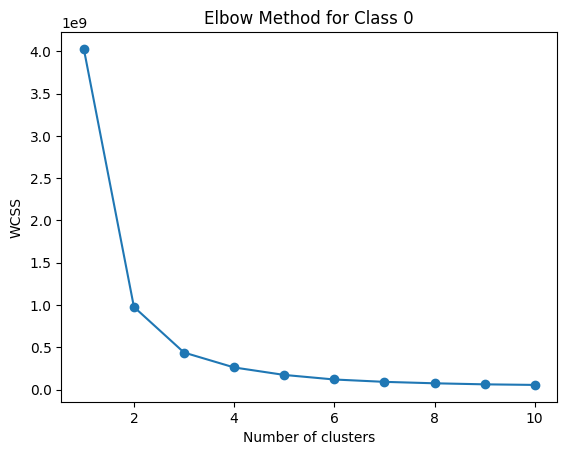

In [ ]:
wcss_0 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_0)
    wcss_0.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_0, marker='o')
plt.title('Elbow Method for Class 0')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

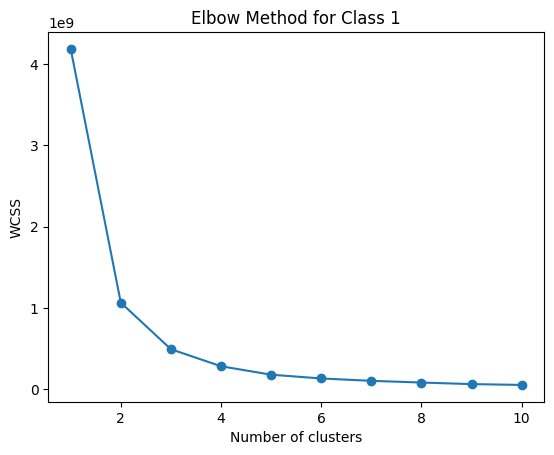

In [ ]:
wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_1)
    wcss_1.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_1, marker='o')
plt.title('Elbow Method for Class 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
n_clusters_0 = 3   # <-- set based on elbow visualization
n_clusters_1 = 3   # <-- set based on elbow visualization

kmeans_0 = KMeans(n_clusters=n_clusters_0, random_state=42)
sub_labels_0 = kmeans_0.fit_predict(X_0)

kmeans_1 = KMeans(n_clusters=n_clusters_1, random_state=42)
sub_labels_1 = kmeans_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 160 samples
Class 0 - Cluster 1: 157 samples
Class 0 - Cluster 2: 157 samples


In [ ]:
counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 1 - Cluster 0: 186 samples
Class 1 - Cluster 1: 166 samples
Class 1 - Cluster 2: 174 samples


In [ ]:
df_0 = X_0.copy()
df_0['Target_Churn'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['Target_Churn'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['Target_Churn'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['Target_Churn', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered retail_customer_churn.csv', index=False)

DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_0 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_0 = dbscan_0.fit_predict(X_0)

dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
sub_labels_1 = dbscan_1.fit_predict(X_1)

In [ ]:
unique_0, counts_0 = np.unique(sub_labels_0, return_counts=True)
for cluster, count in zip(unique_0, counts_0):
    print(f"Class 0 - Cluster {cluster}: {count} samples")

Class 0 - Cluster -1: 474 samples


In [ ]:
unique_1, counts_1 = np.unique(sub_labels_1, return_counts=True)
for cluster, count in zip(unique_1, counts_1):
    print(f"Class 1 - Cluster {cluster}: {count} samples")

Class 1 - Cluster -1: 526 samples


In [ ]:
df_0 = X_0.copy()
df_0['Target_Churn'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['Target_Churn'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['Target_Churn'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['Target_Churn', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered retail_customer_churn.csv', index=False)

Hierarchical Clustering (also called Agglomerative Clustering)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

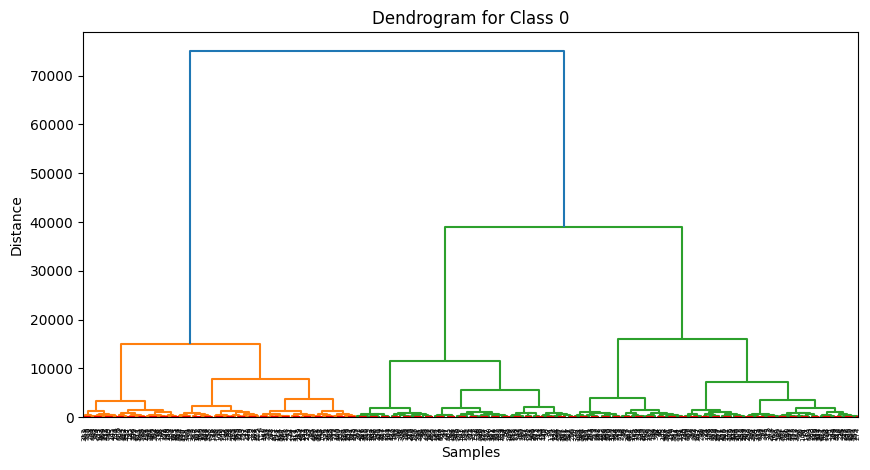

In [ ]:
# Generate linkage matrix for Class 0
Z = linkage(X_0, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram for Class 0")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
Z = linkage(X_0, method='ward')

cluster_labels = fcluster(Z, t=10000, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 6


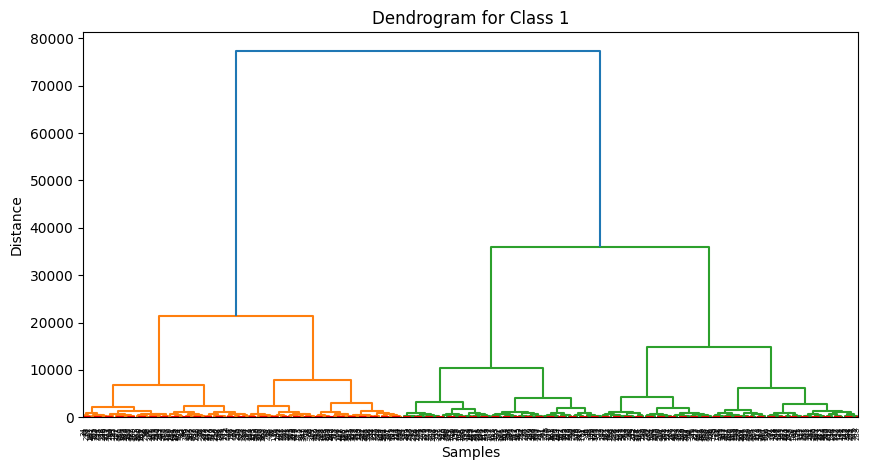

In [ ]:
# Generate linkage matrix for Class 1
Z = linkage(X_1, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram for Class 1")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [ ]:
Z = linkage(X_1, method='ward')

cluster_labels = fcluster(Z, t=10000, criterion='distance')

n_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 6


**or**

In [ ]:
hc_0 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_0 = hc_0.fit_predict(X_0)

hc_1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
sub_labels_1 = hc_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 307 samples
Class 0 - Cluster 1: 167 samples
Class 1 - Cluster 0: 309 samples
Class 1 - Cluster 1: 217 samples


In [ ]:
df_0 = X_0.copy()
df_0['Target_Churn'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['Target_Churn'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['Target_Churn'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['Target_Churn', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered retail_customer_churn.csv', index=False)

**Spectral Clustering**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [ ]:
def run_spectral_clustering(X_data, class_label):
    best_score = -1
    best_k = None
    best_labels = None

    # Search for the best number of clusters
    for k in range(2, 7):
        sc = SpectralClustering(
            n_clusters=k,
            affinity='nearest_neighbors',  # or 'rbf'
            assign_labels='kmeans',
            random_state=42
        )
        labels = sc.fit_predict(X_data)
        score = silhouette_score(X_data, labels)
        print(f"Class {class_label} | n_clusters={k}, Silhouette Score={score:.4f}")

        if score > best_score:
            best_score = score
            best_k = k
            best_labels = labels

    print(f"Best n_clusters for Class {class_label}: {best_k} (Silhouette Score={best_score:.4f})")
    return best_labels, best_k, best_score

In [ ]:
# ---- Run Spectral Clustering with automatic k selection ----
sub_labels_0, best_k_0, best_score_0 = run_spectral_clustering(X_0, class_label=0)
sub_labels_1, best_k_1, best_score_1 = run_spectral_clustering(X_1, class_label=1)

Class 0 | n_clusters=2, Silhouette Score=0.6270
Class 0 | n_clusters=3, Silhouette Score=0.5581
Class 0 | n_clusters=4, Silhouette Score=0.5243
Class 0 | n_clusters=5, Silhouette Score=0.5036
Class 0 | n_clusters=6, Silhouette Score=0.5148
Best n_clusters for Class 0: 2 (Silhouette Score=0.6270)
Class 1 | n_clusters=2, Silhouette Score=0.6176
Class 1 | n_clusters=3, Silhouette Score=0.5169
Class 1 | n_clusters=4, Silhouette Score=0.5287
Class 1 | n_clusters=5, Silhouette Score=0.5102
Class 1 | n_clusters=6, Silhouette Score=0.4818
Best n_clusters for Class 1: 2 (Silhouette Score=0.6176)


In [ ]:
# Show cluster counts
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 234 samples
Class 0 - Cluster 1: 240 samples
Class 1 - Cluster 0: 272 samples
Class 1 - Cluster 1: 254 samples


In [ ]:
df_0 = X_0.copy()
df_0['Target_Churn'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['Target_Churn'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['Target_Churn'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['Target_Churn', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered retail_customer_churn.csv', index=False)

Min batch k-means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans

In [ ]:
n_clusters_0 = 3
mbk_0 = MiniBatchKMeans(
    n_clusters=n_clusters_0,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_0 = mbk_0.fit_predict(X_0)

n_clusters_1 = 3
mbk_1 = MiniBatchKMeans(
    n_clusters=n_clusters_1,
    random_state=42,
    batch_size=256,
    max_iter=100
)
sub_labels_1 = mbk_1.fit_predict(X_1)

In [ ]:
counts_0 = np.bincount(sub_labels_0)
for i, count in enumerate(counts_0):
    print(f"Class 0 - Cluster {i}: {count} samples")

counts_1 = np.bincount(sub_labels_1)
for i, count in enumerate(counts_1):
    print(f"Class 1 - Cluster {i}: {count} samples")

Class 0 - Cluster 0: 164 samples
Class 0 - Cluster 1: 158 samples
Class 0 - Cluster 2: 152 samples
Class 1 - Cluster 0: 180 samples
Class 1 - Cluster 1: 171 samples
Class 1 - Cluster 2: 175 samples


In [ ]:
df_0 = X_0.copy()
df_0['Target_Churn'] = 0
df_0['Cluster_Label'] = sub_labels_0

df_1 = X_1.copy()
df_1['Target_Churn'] = 1
df_1['Cluster_Label'] = sub_labels_1

# Combine both datasets
final_df = pd.concat([df_0, df_1], ignore_index=True)

# Create unique cluster identifiers (combine class + subcluster)
final_df['Combined_Cluster'] = final_df['Target_Churn'].astype(str) + '_' + final_df['Cluster_Label'].astype(str)

# Map to continuous cluster numbers starting from 0
unique_clusters = sorted(final_df['Combined_Cluster'].unique())
cluster_map = {old: new for new, old in enumerate(unique_clusters)}

# Assign new continuous labels
final_df['Cluster_Label'] = final_df['Combined_Cluster'].map(cluster_map)

# Drop helper columns (keep only desired ones)
final_df = final_df.drop(columns=['Target_Churn', 'Combined_Cluster'])

# Save to CSV
final_df.to_csv('Clustered retail_customer_churn.csv', index=False)